# Lecture 14 - Visualizing Networks

In this notebook we will learn how to visualize networks.


Below is the overview of this notebook.


<ol type = 1>
    <li> Calculate different layouts and their runtimes</li>
        <ol type = a>
            <li> Kamada-Kawai</li>
            <li> Spring</li>
            <li> Spectral</li>
            <li>UMAP</li>
        </ol>
    <li> Learn to write Python functions</li>

   <li> Edge thinning </li>
   <li>Draw a large network</li>
   <li>Draw a really large network</li>

</ol>

This notebook can be opened in Colab 
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zlisto/social_media_analytics/blob/main/Lecture14_VisualizingNetworks.ipynb)

Before starting, select "Runtime->Factory reset runtime" to start with your directories and environment in the base state.

If you want to save changes to the notebook, select "File->Save a copy in Drive" from the top menu in Colab.  This will save the notebook in your Google Drive.




# Clones, installs, and imports


## Clone GitHub Repository
This will clone the repository to your machine.  This includes the code and data files.  Then change into the directory of the repository.

In [1]:
!git clone https://github.com/zlisto/social_media_analytics

import os
os.chdir("social_media_analytics")

Cloning into 'social_media_analytics'...
remote: Enumerating objects: 300, done.
remote: Counting objects: 100% (300/300), done.
remote: Compressing objects: 100% (224/224), done.
remote: Total 300 (delta 166), reused 203 (delta 72), pack-reused 0
Receiving objects: 100% (300/300), 20.16 MiB | 8.91 MiB/s, done.
Resolving deltas: 100% (166/166), done.


## Install Requirements 


In [2]:
!pip install -r requirements.txt


     |████████████████████████████████| 58 kB 2.6 MB/s 
     |████████████████████████████████| 3.8 MB 6.9 MB/s 
     |████████████████████████████████| 86 kB 5.4 MB/s 
     |████████████████████████████████| 1.6 MB 39.4 MB/s 
     |████████████████████████████████| 895 kB 32.1 MB/s 
     |████████████████████████████████| 6.5 MB 7.2 MB/s 
     |████████████████████████████████| 596 kB 45.7 MB/s 
     |████████████████████████████████| 67 kB 1.9 MB/s 
     |████████████████████████████████| 1.1 MB 44.3 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=506b847a8c917bc6df15fcd9c840cddec31999b2c9758d8a06066cb34846c6a4
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=d6bd135cf865c9927975132622b685cf820a6232aaba5c2e00e02154ec0fc662
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a7

## Import Packages

We have some custom functions that thin a network's edges (for easier visualization) and create layouts based on UMAP.


In [3]:
import networkx as nx
import networkx.algorithms.community as nx_comm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

from scripts.communities import spectral_communities
from scripts.communities import umap_layout,network_thinner



# Load network into a networkx object

The follower network is saved in a pickle file as a networkx object.

In [4]:
#filename of follower network
fname_following = "data/friends_network_JoeBiden.pickle"
G = nx.read_gpickle(fname_following)


nv = G.number_of_nodes()
ne = G.number_of_edges()
print(f"Network has {nv} nodes and {ne} edges")

Network has 27 nodes and 156 edges


# Calculating Runtimes

We can use the magic function `%time` to calcualate how long a line of code takes to run.  It will print out the runtime of the line.

We can use the magic cell function `%%time` to calculate how long a cell of code takes to run.  It will print out the runtime of the cell.  If you are using `%%time`, it has the be the first line in the cell, even before any comments.


In [5]:
%time y = [np.cos(x/10) for x in range(10000)]
%time y = [np.cos(x/10) for x in range(100000)]


CPU times: user 14.2 ms, sys: 0 ns, total: 14.2 ms
Wall time: 15.7 ms
CPU times: user 91.7 ms, sys: 4.95 ms, total: 96.6 ms
Wall time: 97.2 ms


In [6]:
%%time
y = [np.cos(x/10) for x in range(100000)]
y = [np.cos(x/10) for x in range(10000)]

CPU times: user 110 ms, sys: 2 ms, total: 112 ms
Wall time: 113 ms


# Calculate different layouts and their runtimes

We can use the `%time` function to get the runtimes of various layout algortithms: Kamada-Kawai, spring, spectral, and UMAP.  For the UMAP layout, you can use the `umap_layout` function.  The layouts are returned as dictionaries, where the key is the node and the value is the x,y coordinate as an array.

## Kamada-Kawai layout

In [7]:
#Kamada-Kawai layout
%time pos_kk = nx.kamada_kawai_layout(G)

CPU times: user 19.4 ms, sys: 1.98 ms, total: 21.4 ms
Wall time: 27 ms


## Spring layout

In [8]:
#Spring layout
%time pos_spring = nx.spring_layout(G)


CPU times: user 12.5 ms, sys: 976 µs, total: 13.4 ms
Wall time: 15.6 ms


## Spectral layout

In [9]:
#Spectral layout
%time pos_spec = nx.spectral_layout(G)


CPU times: user 3.91 ms, sys: 41 µs, total: 3.95 ms
Wall time: 18 ms


## UMAP layout

In [10]:
#UMAP layout
%time pos_umap = umap_layout(G)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


CPU times: user 9.35 s, sys: 79.4 ms, total: 9.43 s
Wall time: 9.37 s


# Draw Network Layouts

## Write a function to draw network 

When we repeat code many times, it is helpful to write a function to perform what this code does.  This makes your code clearner.  A function in Python is defined with the syntax 

`def function_name(input_arguments):
    your code here
    return your_function_output`
    
The function is called `function_name` (you pick this), and takes some input arguments.  It also returns some outputs.

We will be drawing the same network over and over again with different layouts, so we will write a custom network drawing function.  We call this function `draw_network_pos`.  The input arguments are the network `G`, the layout dictionary `pos`.  The output is the figure handle `fig`.

In [11]:
def draw_network_pos(G,pos):
    node_size = 10
    node_color = 'pink'
    width = 0.5
    edge_color = 'white'
    bg_color = 'black'
    
    fig = plt.figure(figsize= (8,6))
    ax = plt.subplot(1,1,1)
    nx.draw(G, width=width,pos=pos ,node_color=node_color,
            edge_color=edge_color,node_size=node_size,
            connectionstyle='arc3')
    plt.title("Title",color = "white")
    fig.set_facecolor(bg_color)
   
    return ax

## Kamada-Kawai layout

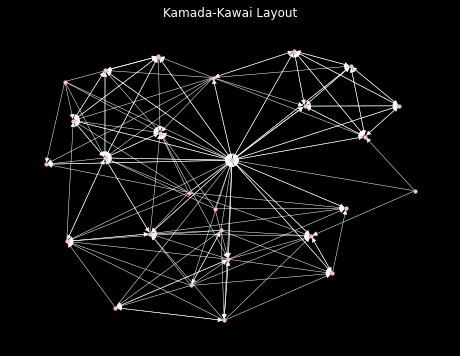

In [12]:
#Draw Kamada-Kawai Layout
ax = draw_network_pos(G,pos_kk)
ax.set_title("Kamada-Kawai Layout");

## Spring layout


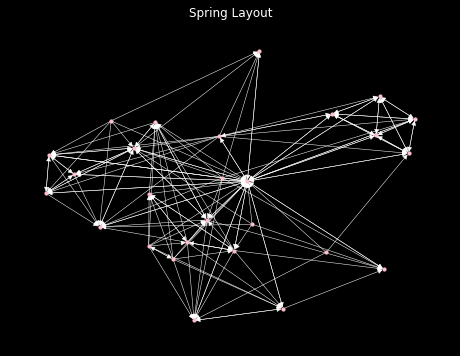

In [13]:
#Draw spring layout
ax = draw_network_pos(G,pos_spring)
ax.set_title("Spring Layout");

## Spectral layout

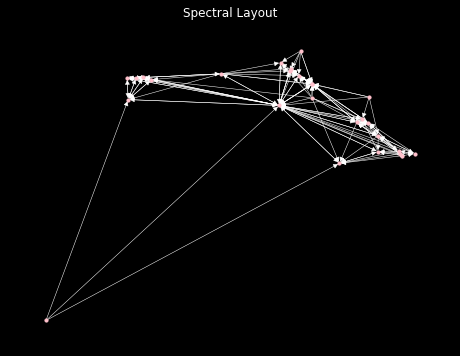

In [14]:
#Draw spectral layout
ax = draw_network_pos(G,pos_spec)
ax.set_title("Spectral Layout");

## UMAP layout

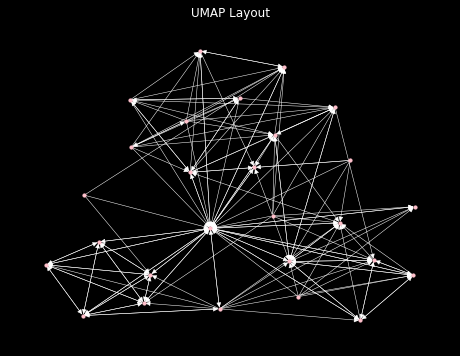

In [15]:
#Draw UMAP layout
ax = draw_network_pos(G,pos_umap)
ax.set_title("UMAP Layout");

## Drawing the Undirected Network

Sometimes you don't want the arrows shown in a directed network drawing.  We can instead draw the undirected network.  To do this, we can created an undirected version of the network, `Gu`, and draw this instead. 

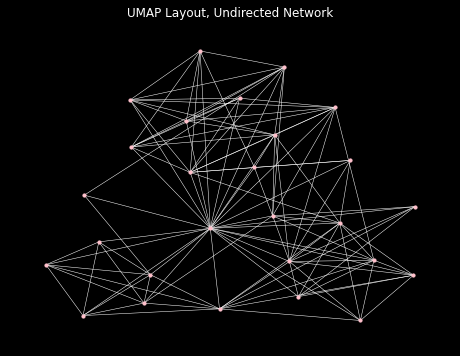

In [16]:
Gu = G.to_undirected()
ax = draw_network_pos(Gu,pos_umap)
ax.set_title("UMAP Layout, Undirected Network");

# Drawing Large Networks

Now we are going to draw larger networks.  We will see that spectral and UMAP layouts can be computed in reasonable time.  We will also see that drawing all edges will takes a long time, but does not convey new information, so for plotting purposes we will thin the network by removing a fraction of the edges.

## Load large network

We will use the built-in network generator functions in networkx to create a large synthetic graph. We will use the `stochastic_block_model` function.  This generates a network with communities (blocks) that are densely connected inside, and sparsely connected to other communities.

In [17]:
community_sizes = [500, 500]
pin = 0.1
pout = 0.01
connection_probabilities = [[pin, pout], [pout, pin]]
G = nx.stochastic_block_model(community_sizes, connection_probabilities, seed=0)
nv = G.number_of_nodes()
ne = G.number_of_edges()
print(f"Network has {nv} nodes and {ne} edges")

Network has 1000 nodes and 27706 edges


## Calculate different network layouts


In [18]:
%time pos_spring = nx.spring_layout(G)
%time pos_spec = nx.spectral_layout(G)
%time pos_umap = umap_layout(G)

CPU times: user 7.21 s, sys: 28.4 ms, total: 7.24 s
Wall time: 7.24 s
CPU times: user 86.9 ms, sys: 23.1 ms, total: 110 ms
Wall time: 82.1 ms
CPU times: user 7.94 s, sys: 228 ms, total: 8.16 s
Wall time: 5.76 s


In [19]:
%time pos_kk = nx.kamada_kawai_layout(G)


CPU times: user 1min 36s, sys: 478 ms, total: 1min 36s
Wall time: 1min 36s


## Draw the network

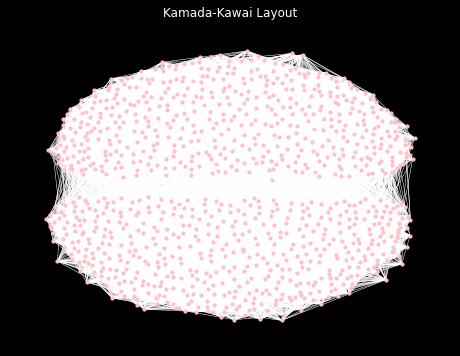

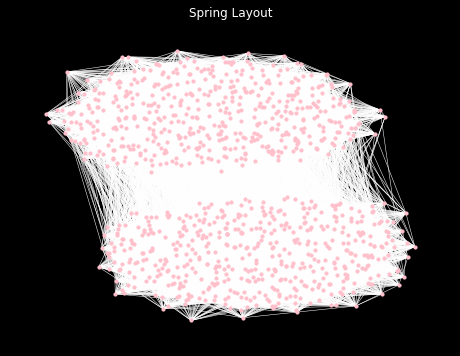

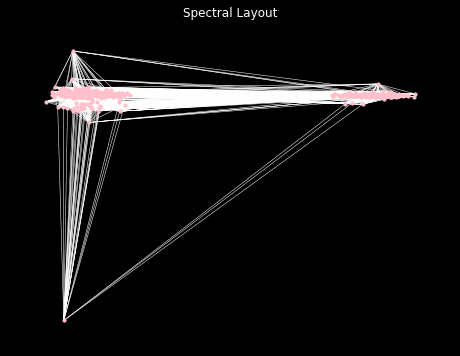

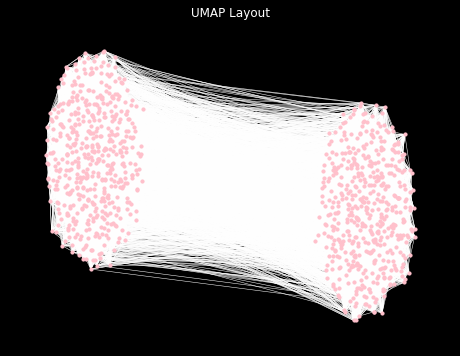

In [20]:
#Draw Kamada-Kawai Layout
ax = draw_network_pos(G,pos_kk)
ax.set_title("Kamada-Kawai Layout");
#Draw spring layout
ax = draw_network_pos(G,pos_spring)
ax.set_title("Spring Layout");
#Draw spectral layout
ax = draw_network_pos(G,pos_spec)
ax.set_title("Spectral Layout");
#Draw UMAP layout
ax = draw_network_pos(G,pos_umap)
ax.set_title("UMAP Layout");

## Make a better custom drawing function

You might notice the nodes are kind of big, and the edges are kind of thick.  This is because we fixed these parameters in our custom draw function.  Let's add some more inputs to make our function more flexible.

In [21]:
def draw_network_pos_better(G,pos,node_size=10,width=0.1,node_color="red",
                            edge_color="white",bg_color="black"):
    fig = plt.figure(figsize= (8,6))
    ax = plt.subplot(1,1,1)
    nx.draw(G, width=width,pos=pos ,node_color=node_color,
            edge_color=edge_color,node_size=node_size,
            connectionstyle='arc3')
    plt.title("Title",color = "white")
    fig.set_facecolor(bg_color)
   
    return ax

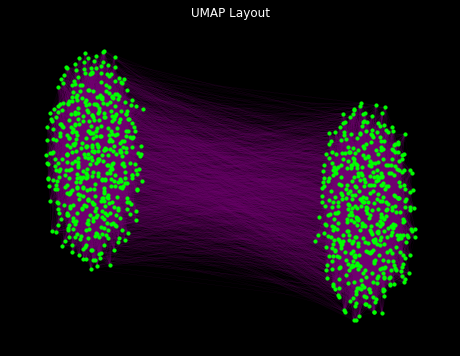

In [22]:
#Draw UMAP layout
ax = draw_network_pos_better(G,pos_umap,node_size = 10,width = 0.05,node_color = 'lime',
                             edge_color = 'purple')
ax.set_title("UMAP Layout");

## Find communities and draw with community colors

Let's find two spectral communities in the network and draw it again, this time with the nodes colored by their community.

In [23]:
df_spec = spectral_communities(G,2)
Colors = ['blue','red']
node_color = [Colors[df_spec.community[df_spec.screen_name==node].values[0]] for node in G.nodes()]


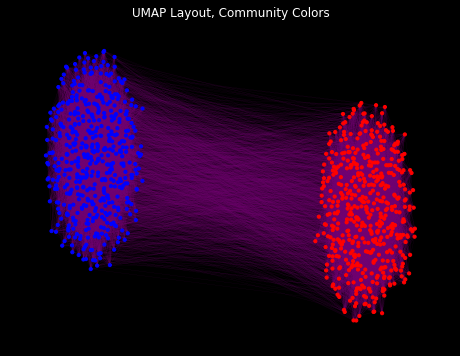

In [26]:
ax = draw_network_pos_better(G,pos_umap,node_size = 10,width = 0.05,node_color = node_color,
                             edge_color = 'purple')
ax.set_title("UMAP Layout, Community Colors");

# Thinning the Network

To make the plot less dense, we can thin the network by randomly removing a bunch of edges, and then plotting this thinned network.  We can do this using the `network_thinner` function.  This takes as input a network `G` and the fraction of edges you want to keep `final_frac`.  It returns a thinned network `Gthin`.

A rule of thumb:  your drawing should have less than a few thousand edges to draw in reasonable time.

In [27]:
final_frac = 1000/ne
Gthin = network_thinner(G,final_frac)

print(f"G has {G.number_of_edges()} edges")
print(f"Gthin has {Gthin.number_of_edges()} edges")

G has 27706 edges
Gthin has 1000 edges


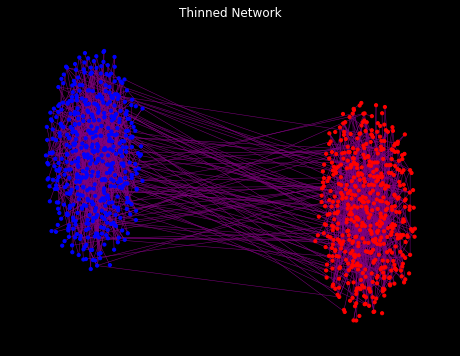

In [32]:
ax = draw_network_pos_better(Gthin
,pos_umap,node_size = 10,width = 0.5,node_color = node_color,
                             edge_color = 'purple')
ax.set_title("Thinned Network");

### Compare drawing the full vs. thinned network

Drawing the thinned network is faster than the full network.

CPU times: user 391 ms, sys: 21.9 ms, total: 413 ms
Wall time: 445 ms


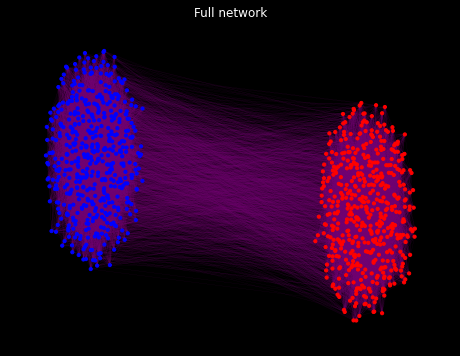

In [35]:
%%time
ax = draw_network_pos_better(G,pos_umap,node_size = 10,width = 0.05,node_color = node_color,
                             edge_color = 'purple')
ax.set_title("Full network");

CPU times: user 58.2 ms, sys: 2.95 ms, total: 61.2 ms
Wall time: 61.1 ms


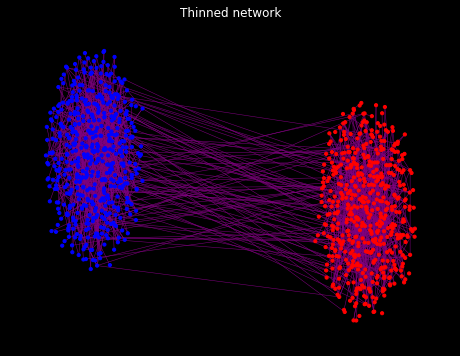

In [36]:
%%time
ax = draw_network_pos_better(Gthin,pos_umap,node_size = 10,width = 0.5,node_color = node_color,
                             edge_color = 'purple')
ax.set_title("Thinned network");

# Drawing Really Large Networks

Let's try an even bigger stochastic block model network.

In [37]:
%%time
community_sizes = [5000, 5000]
pin = 0.005
pout = 0.0001
connection_probabilities = [[pin, pout], [pout, pin]]
G = nx.stochastic_block_model(community_sizes, connection_probabilities, seed=0)
nv = G.number_of_nodes()
ne = G.number_of_edges()
print(f"Network has {nv} nodes and {ne} edges")

Network has 10000 nodes and 127861 edges
CPU times: user 5.11 s, sys: 15.1 ms, total: 5.13 s
Wall time: 5.21 s


### Calculate UMAP layout

In [38]:
%time pos_umap = umap_layout(G)

CPU times: user 1min 53s, sys: 565 ms, total: 1min 53s
Wall time: 1min 15s


### Find Spectral Communities

This takes a while :(

In [40]:
%%time
df_spec = spectral_communities(G,2)


CPU times: user 2min 53s, sys: 1min 30s, total: 4min 23s
Wall time: 2min 15s


### Community Colors

We will load the saved communities and create the node colors.

In [41]:
#df_spec = pd.read_csv("data/communities_sbm.csv")
Colors = ['blue','red']
node_color = [Colors[df_spec.community[df_spec.screen_name==node].values[0]] for node in G.nodes()]


### Draw thinned network

In [42]:
final_frac = 5000/ne
Gthin = network_thinner(G,final_frac)

print(f"G has {G.number_of_edges()} edges")
print(f"Gthin has {Gthin.number_of_edges()} edges")

G has 127861 edges
Gthin has 5000 edges


CPU times: user 150 ms, sys: 28.8 ms, total: 179 ms
Wall time: 146 ms


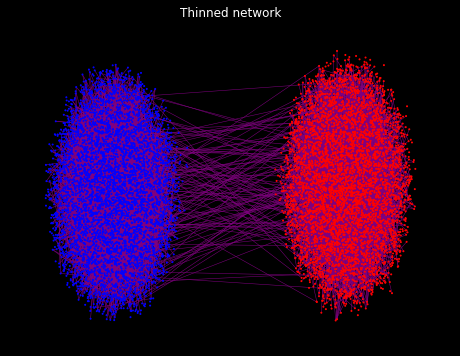

In [43]:
%%time
ax = draw_network_pos_better(Gthin,pos_umap,node_size = 10,width = 0.5,node_color = node_color,
                             edge_color = 'purple')
ax.set_title("Thinned network");

CPU times: user 1.3 s, sys: 96 ms, total: 1.4 s
Wall time: 1.36 s


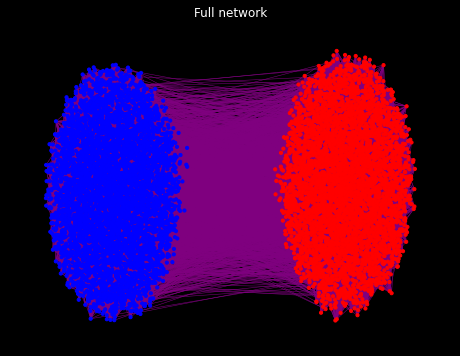

In [45]:
%%time 
ax = draw_network_pos_better(G,pos_umap,node_size = 10,width = 0.5,node_color = node_color,
                             edge_color = 'purple')
ax.set_title("Full network");